In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:
df = pd.read_csv('coahuilafinal.csv') # Se guarda el dataset en un dataframe

In [5]:
df.head(10)

Mujeres de 12-49  Poblacion Total  Poblacion de 0 a 5  Personas c/religion  \
0          2.800743         1.791759            2.135242             3.885183   
1          1.386294         2.564949            2.135242             2.197225   
2          0.000000         0.000000            0.000000             0.000000   
3          2.800743         3.784190            2.135242             3.433987   
4          1.791759         2.944439            2.135242             2.890372   
5          2.800743         2.397895            0.000000             2.302585   
6          2.800743         3.663562            2.135242             3.885183   
7          2.800743         2.079442            2.135242             1.945910   
8          2.800743         3.178054            2.135242             3.178054   
9          3.367296         4.304065            2.302585             4.007333   

   Personas Casadas  Personas Ocupadas  Prom. Grado Escolar  \
0          3.195270           3.253205             2.293280   
1          2.079442           2.197225             2.557227   
2          0.000000           0.000000             0.000000   
3          3.295837           2.708050             2.385086   
4          2.197225           1.945910             2.607124   
5          1.945910           1.609438             2.140066   
6          3.044522           2.995732             2.223542   
7          3.195270           1.609438             2.564949   
8          2.639057           2.302585             2.014903   
9          3.332205           3.178054             2.328253   

   Personas C/Servicio de Salud  
0                      3.790339  
1                      2.397895  
2                      0.000000  
3                      3.496508  
4                      2.484907  
5                      2.397895  
6                      3.135494  
7                      0.000000  
8                      2.564949  
9                      3.737670

In [7]:
df.shape

(59062, 8)

In [8]:
# Verificar si los datos están balanceados
balanceados = df['Poblacion de 0 a 5'].value_counts().min() == df['Poblacion de 0 a 5'].value_counts().max()
if balanceados:
  print("Los datos están balanceados.")
else:
  print("Los datos no están balanceados.")

Los datos no están balanceados.


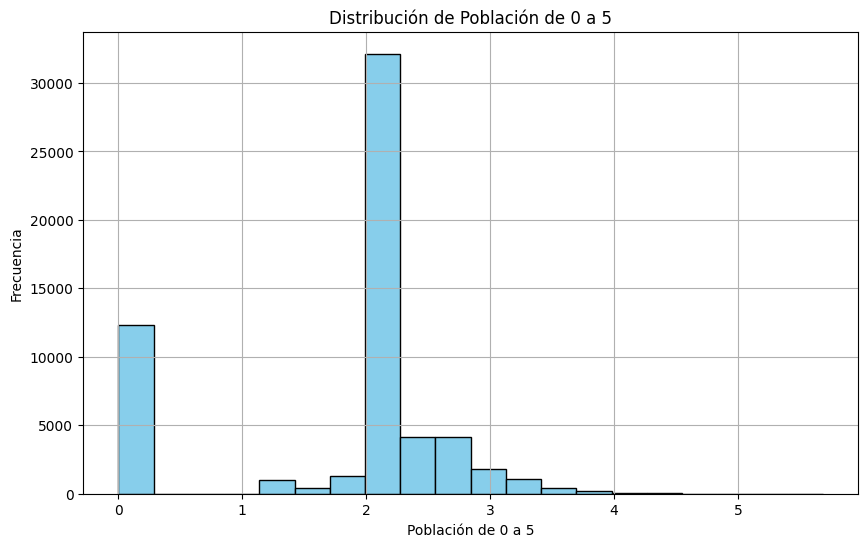

In [9]:
# Eliminamos los valores NaN si existen
df_clean = df.dropna(subset=['Poblacion de 0 a 5'])

# Creamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Poblacion de 0 a 5'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Población de 0 a 5')
plt.xlabel('Población de 0 a 5')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<ipython-input-10-4ab475a0bef5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['Poblacion de 0 a 5'], shade=True, color='skyblue')


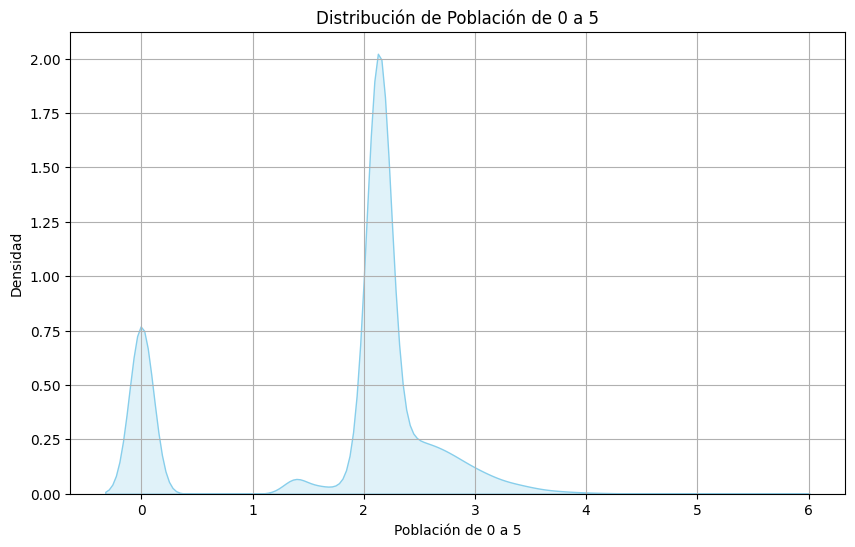

In [10]:
# gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df_clean['Poblacion de 0 a 5'], shade=True, color='skyblue')
plt.title('Distribución de Población de 0 a 5')
plt.xlabel('Población de 0 a 5')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

## Lineal y Decission Tree Regressor

In [ ]:
# Seleccionar las características (variables independientes) y la variable objetivo
X = df.drop('Poblacion de 0 a 5', axis=1)  # Características
y = df['Poblacion de 0 a 5']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Error cuadrático medio (MSE):
Regresión Lineal: 0.26701298231367554
Árbol de Decisión: 0.24715330027892296


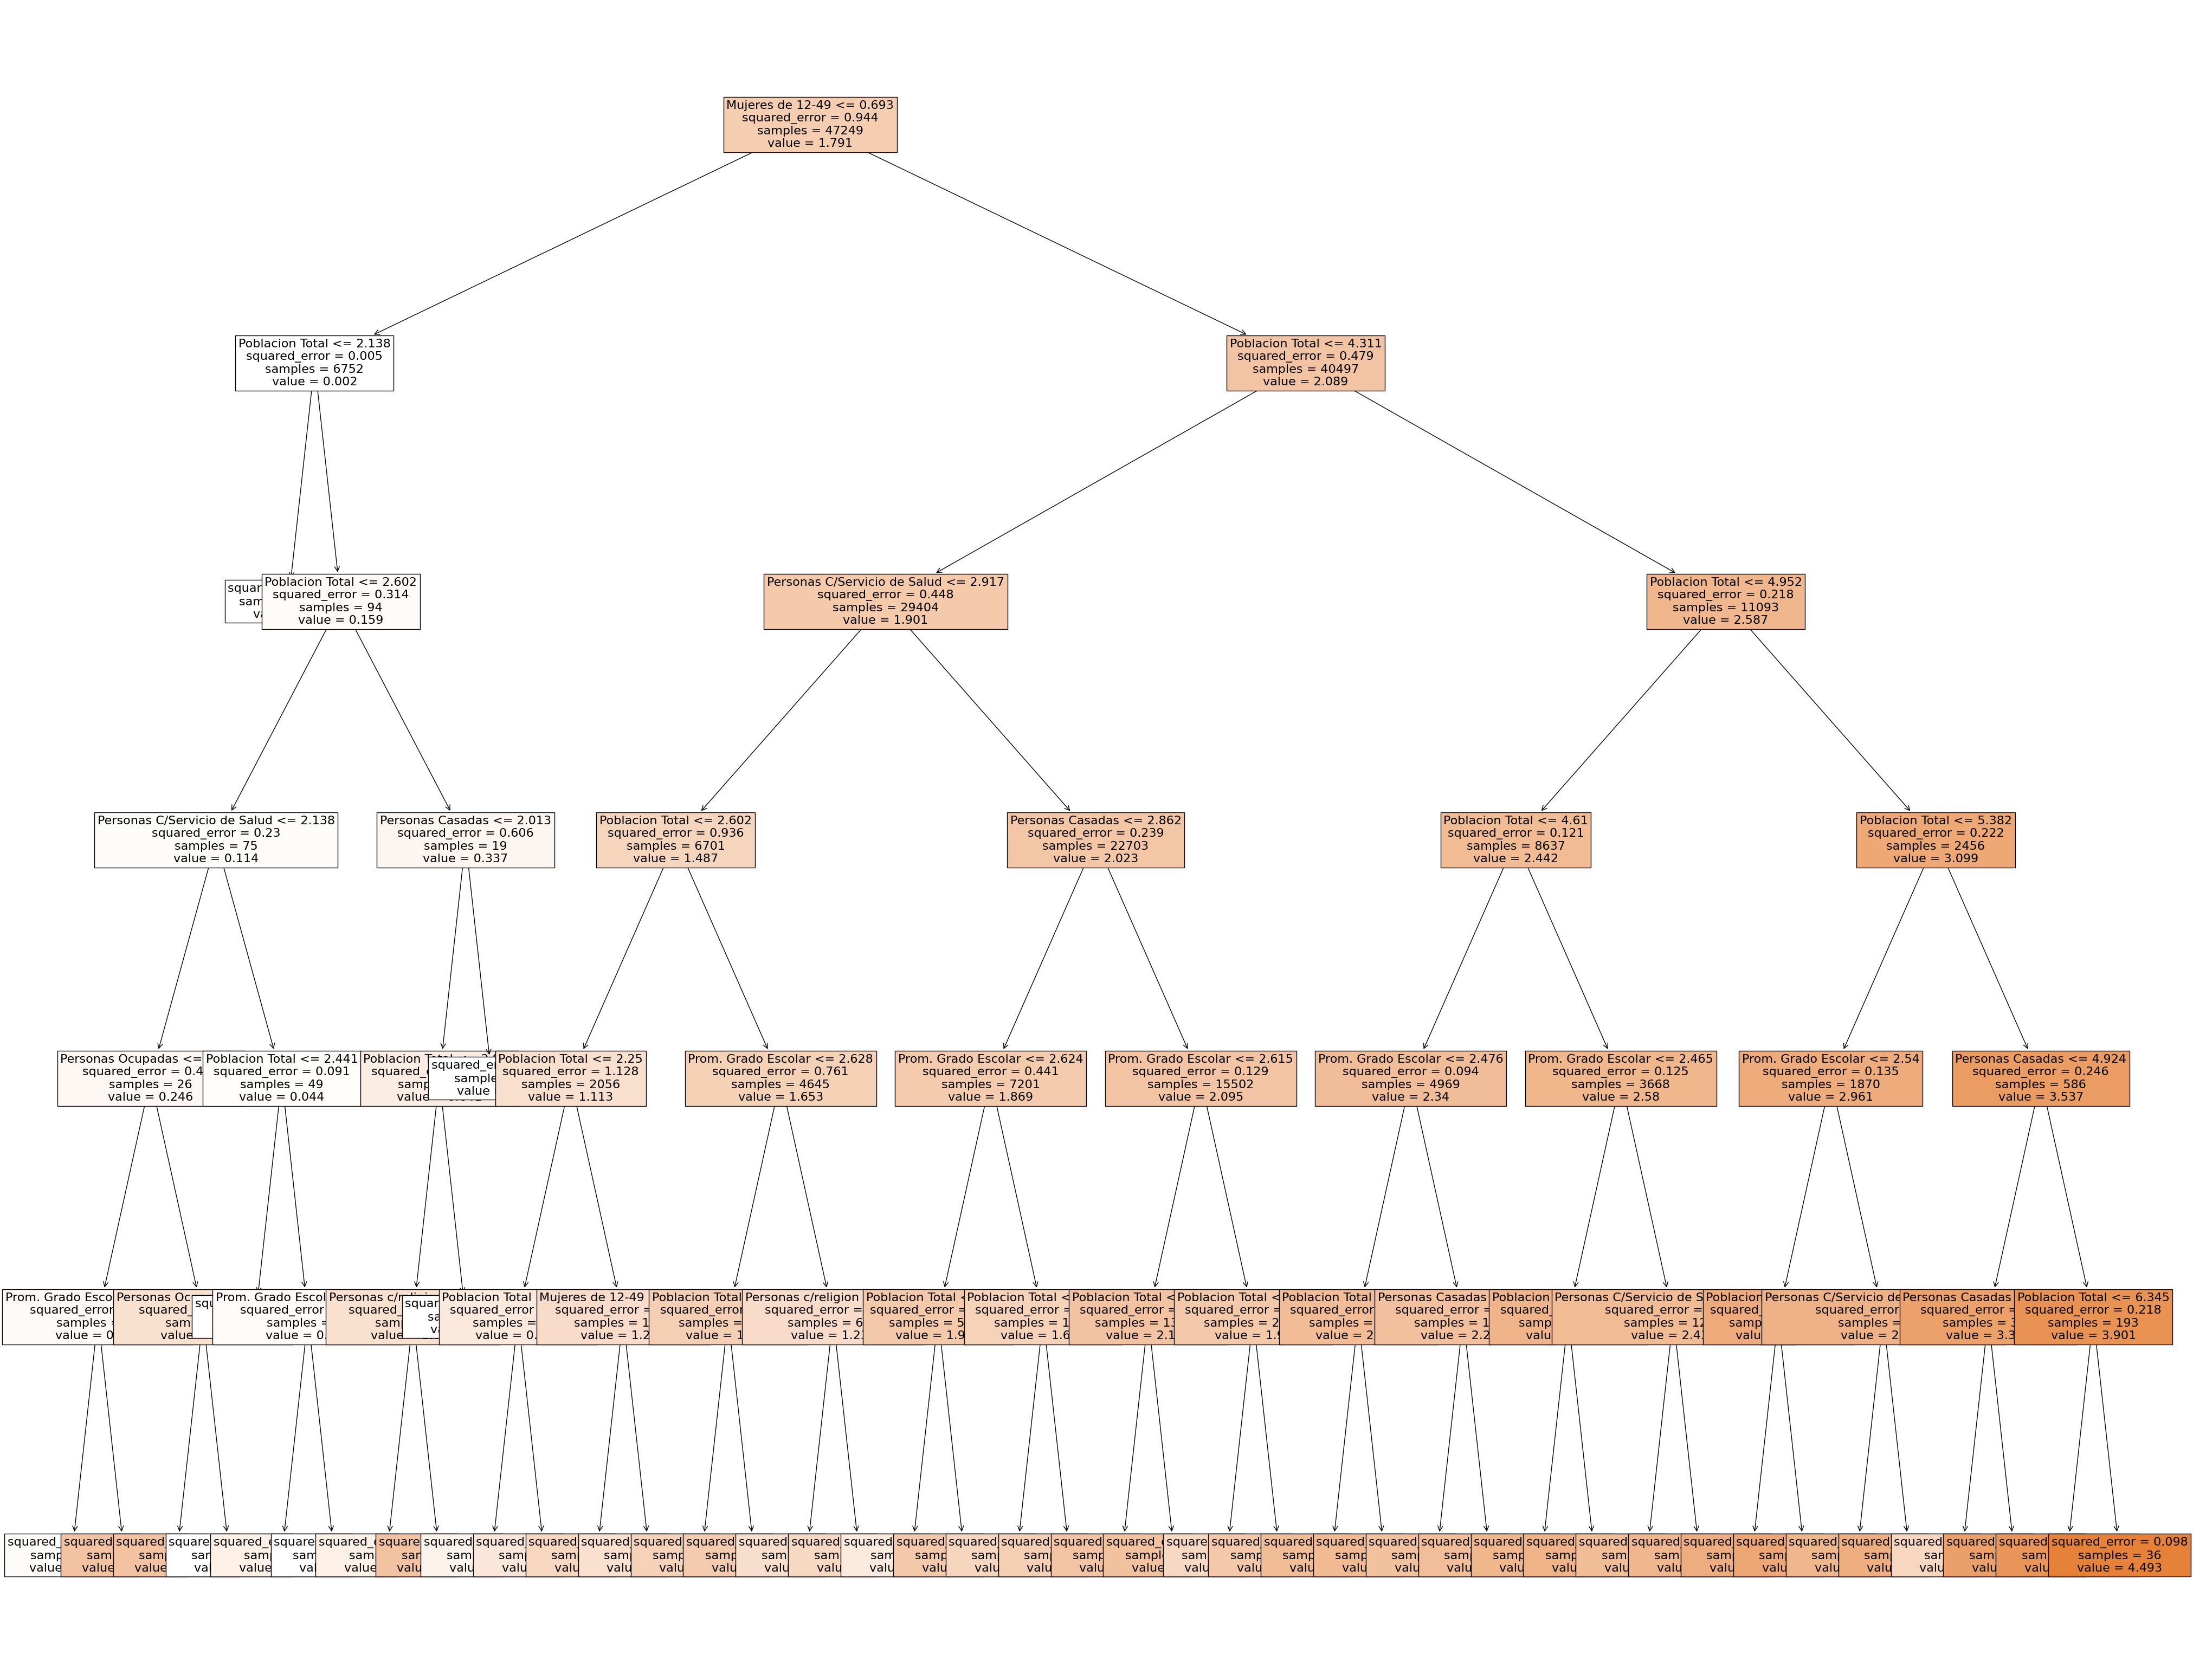

Test Accuracy arbol: 74.21%
Test R^2 Score para arbol: 0.74

Test Accuracy RL: 72.14%
Test R^2 Score para RL: 0.72
Coefficients de RL: 
 [ 0.13841907  0.05534096  0.11400557  0.16193589 -0.06470389 -0.14117601
  0.29010158]



In [ ]:
# Modelo de Regresión Lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_train, y_train)

# Modelo de Regresión Logística
# Nota: La regresión logística es para problemas de clasificación, no de regresión.
# Si la variable objetivo es categórica, entonces se debe usar clasificación logística.
# Si 'Poblacion_0_5' es categórica, se debe ajustar a un modelo de clasificación.

#modelo_regresion_logistica = LogisticRegression()
#modelo_regresion_logistica.fit(X_train, y_train)

# Modelo de Árbol de Decisión
modelo_arbol_decision = DecisionTreeRegressor(max_depth=6)
modelo_arbol_decision.fit(X_train, y_train)

# Predecir con los modelos
predicciones_regresion_lineal = modelo_regresion_lineal.predict(X_test)
#predicciones_regresion_logistica = modelo_regresion_logistica.predict(X_test)
predicciones_arbol_decision = modelo_arbol_decision.predict(X_test)

# Evaluar los modelos
# Para modelos de regresión, se puede usar el error cuadrático medio (MSE)
mse_regresion_lineal = mean_squared_error(y_test, predicciones_regresion_lineal)
#mse_regresion_logistica = mean_squared_error(y_test, predicciones_regresion_logistica)
mse_arbol_decision = mean_squared_error(y_test, predicciones_arbol_decision)

print("Error cuadrático medio (MSE):")
print("Regresión Lineal:", mse_regresion_lineal)
#print("Regresión Logística:", mse_regresion_logistica)
print("Árbol de Decisión:", mse_arbol_decision)

# plot tree
plt.figure(figsize=(50, 40))
tree.plot_tree(modelo_arbol_decision , fontsize=16
               , feature_names=X.columns,
               filled=True
               )
plt.show()

# Accuracy arbol
model_acc = modelo_arbol_decision.score(X_test, y_test)
print("Test Accuracy arbol: {:.2f}%".format(model_acc * 100))

# R^2 score arbol
model_acc = modelo_arbol_decision.score(X_test, y_test)
print("Test R^2 Score para arbol: {:.2f}".format(model_acc))


print()

# Accuracy RL
model_acc1 = modelo_regresion_lineal.score(X_test, y_test)
print("Test Accuracy RL: {:.2f}%".format(model_acc1 * 100))

# R^2 score RL
model_acc1 = modelo_regresion_lineal.score(X_test, y_test)
print("Test R^2 Score para RL: {:.2f}".format(model_acc1))


# The coefficients
print("Coefficients de RL: \n", modelo_regresion_lineal.coef_)

# The coefficients
print()



In [ ]:
# Mostrar predicciones versus valores reales para regresión lineal
# Realizar 10 predicciones de cada modelo

# Realizar las predicciones con los modelos
predicciones_regresion_lineal = modelo_regresion_lineal.predict(X_test[:10])
#predicciones_regresion_logistica = modelo_regresion_logistica.predict(X_test[:10])
predicciones_arbol_decision = modelo_arbol_decision.predict(X_test[:10])

# Obtener los índices de los primeros 10 datos en el conjunto de prueba
indices = X_test.index[:10]

# Mostrar predicciones versus valores reales junto con los índices
print("Predicciones vs Valores Reales:")
for i, (idx, pred_rl, pred_tree, real) in enumerate(zip(indices, predicciones_regresion_lineal, predicciones_arbol_decision, y_test[:10]), 1):
    print(f"Índice: {idx}, Predicción RL: {pred_rl:.2f}, Predicción Tree: {pred_tree:.2f}, Valor Real: {real:.2f}")

Predicciones vs Valores Reales:
Índice: 20184, Predicción RL: 1.93, Predicción Tree: 1.94, Valor Real: 2.14
Índice: 40145, Predicción RL: 0.03, Predicción Tree: 0.00, Valor Real: 0.00
Índice: 56829, Predicción RL: 0.03, Predicción Tree: 0.00, Valor Real: 0.00
Índice: 35073, Predicción RL: 1.40, Predicción Tree: 1.37, Valor Real: 2.14
Índice: 4053, Predicción RL: 1.50, Predicción Tree: 1.85, Valor Real: 2.14
Índice: 1246, Predicción RL: 1.22, Predicción Tree: 1.43, Valor Real: 2.14
Índice: 29509, Predicción RL: 1.87, Predicción Tree: 1.94, Valor Real: 1.39
Índice: 6742, Predicción RL: 2.01, Predicción Tree: 2.09, Valor Real: 2.14
Índice: 11203, Predicción RL: 3.05, Predicción Tree: 3.16, Valor Real: 3.00
Índice: 7208, Predicción RL: 1.39, Predicción Tree: 1.60, Valor Real: 2.14


In [ ]:
# Verificar si los índices son correctos
for idx in indices:
    if idx in df.index:
        print(f"Índice {idx} encontrado en el DataFrame original.")
    else:
        print(f"Índice {idx} no encontrado en el DataFrame original.")

Índice 20184 encontrado en el DataFrame original.
Índice 40145 encontrado en el DataFrame original.
Índice 56829 encontrado en el DataFrame original.
Índice 35073 encontrado en el DataFrame original.
Índice 4053 encontrado en el DataFrame original.
Índice 1246 encontrado en el DataFrame original.
Índice 29509 encontrado en el DataFrame original.
Índice 6742 encontrado en el DataFrame original.
Índice 11203 encontrado en el DataFrame original.
Índice 7208 encontrado en el DataFrame original.


In [ ]:
# Predicciones con 10 valores aleatorios
import random

# Obtener 10 índices aleatorios del conjunto de prueba
indices_aleatorios = random.sample(list(X_test.index), 10)

# Realizar las predicciones con los modelos para los 10 datos aleatorios
predicciones_regresion_lineal = modelo_regresion_lineal.predict(X_test.loc[indices_aleatorios])
# predicciones_regresion_logistica = modelo_regresion_logistica.predict(X_test.loc[indices_aleatorios])
predicciones_arbol_decision = modelo_arbol_decision.predict(X_test.loc[indices_aleatorios])
valores_reales = y_test.loc[indices_aleatorios]

# Mostrar predicciones versus valores reales para los datos aleatorios
print("Predicciones vs Valores Reales:")
for idx, pred_rl, pred_tree, real in zip(indices_aleatorios, predicciones_regresion_lineal, predicciones_arbol_decision, valores_reales):
    print(f"Índice: {idx}, Predicción RL: {pred_rl:.2f}, Predicción Tree: {pred_tree:.2f}, Valor Real: {real:.2f}")

Predicciones vs Valores Reales:
Índice: 53659, Predicción RL: 0.03, Predicción Tree: 0.00, Valor Real: 0.00
Índice: 27907, Predicción RL: 1.80, Predicción Tree: 1.94, Valor Real: 1.79
Índice: 5245, Predicción RL: 2.20, Predicción Tree: 2.09, Valor Real: 2.14
Índice: 11124, Predicción RL: 1.91, Predicción Tree: 1.94, Valor Real: 2.14
Índice: 5389, Predicción RL: 2.10, Predicción Tree: 2.09, Valor Real: 1.95
Índice: 28685, Predicción RL: 1.82, Predicción Tree: 1.94, Valor Real: 2.14
Índice: 7258, Predicción RL: 2.04, Predicción Tree: 2.09, Valor Real: 2.14
Índice: 40464, Predicción RL: 2.25, Predicción Tree: 2.19, Valor Real: 2.30
Índice: 39303, Predicción RL: 2.81, Predicción Tree: 2.93, Valor Real: 2.40
Índice: 35471, Predicción RL: 2.22, Predicción Tree: 1.97, Valor Real: 2.14


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix


In [ ]:
# Analizar la regresión logística de manera distinta, pues es un modelo de clasificación
# y MSE está diseñado para modelos de regresión
# Calcular precisión

# Modelo de Regresión Logística
# modelo_regresion_logistica = LogisticRegression()  # Puedes probar 'auto' o 'multinomial' también
# modelo_regresion_logistica.fit(X_train, y_train)

# Predecir con el modelo
# predicciones_regresion_logistica = modelo_regresion_logistica.predict(X_test)

# Calcular precisión
# precision = accuracy_score(y_test, predicciones_regresion_logistica)
# print("Precisión:", precision)

# Calcular AUC-ROC
# auc_roc = roc_auc_score(y_test, predicciones_regresion_logistica)
# print("Área bajo la curva ROC (AUC-ROC):", auc_roc)

# Calcular matriz de confusión
# matriz_confusion = confusion_matrix(y_test, predicciones_regresion_logistica)
# print("Matriz de confusión:")
# print(matriz_confusion)

In [ ]:
from sklearn import linear_model

## Lasso

Lasso -del inglés Least Absolute Shrinkage and Selection Operator- es un modelo lineal que penaliza el vector de coeficientes añadiendo su norma L1 (basada en la distancia Manhattan) a la función de coste:

RSS Lasso Lasso tiende a generar "coeficientes dispersos": vectores de coeficientes en los que la mayoría de ellos toman el valor cero. Esto quiere decir que el modelo va a ignorar algunas de las características predictivas, lo que puede ser considerado un tipo de selección automática de características. El incluir menos características supone un modelo más sencillo de interpretar que puede poner de manifiesto las características más importantes del conjunto de datos. En el caso de que exista cierta correlación entre las características predictivas, Lasso tenderá a escoger una de ellas al azar.

In [ ]:
reg_lasso = linear_model.Lasso(alpha=0.005)
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.005)

In [ ]:
reg_lasso.coef_.round(4)

array([ 0.1178,  0.0509,  0.0865,  0.143 ,  0.    , -0.0825,  0.2638])

In [ ]:
# Make predictions using the testing set
y_pred_lasso = pd.Series(reg_lasso.predict(X_test))
y_pred_lasso.index = y_test.index
Resultados = pd.DataFrame([y_test,y_pred_lasso]).T
Resultados.columns = ["y_test","y_pred_lasso"]
Resultados

y_test  y_pred_lasso
20184  2.135242      1.894509
40145  0.000000      0.024595
56829  0.000000      0.024595
35073  2.135242      1.442636
4053   2.135242      1.497026
...         ...           ...
9803   2.135242      1.864231
58051  2.079442      2.188192
6882   2.135242      2.014169
19753  0.000000      0.024595
6810   2.564949      2.528916

[11813 rows x 2 columns]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# The coefficients
print("Coefficients: \n", reg_lasso.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error( Resultados["y_test"], Resultados["y_pred_lasso"]))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score( Resultados["y_test"], Resultados["y_pred_lasso"]))


Coefficients: 
 [ 0.11775129  0.05092333  0.08648451  0.14304521  0.         -0.08245952
  0.26379307]
Mean squared error: 0.27
Coefficient of determination: 0.72


## Ridge

In [ ]:
reg_ridge = linear_model.Ridge(alpha=0.5)
reg_ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
reg_ridge.coef_.round(4)

array([ 0.1384,  0.0553,  0.114 ,  0.1619, -0.0647, -0.1412,  0.2901])

In [ ]:
# Make predictions using the testing set
y_pred_ridge = pd.Series(reg_ridge.predict(X_test))
y_pred_ridge.index = y_test.index
Resultados = pd.DataFrame([y_test,y_pred_ridge]).T
Resultados.columns = ["y_test", "y_pred_ridge"]
Resultados

y_test  y_pred_ridge
20184  2.135242      1.927754
40145  0.000000      0.034616
56829  0.000000      0.034616
35073  2.135242      1.400132
4053   2.135242      1.503118
...         ...           ...
9803   2.135242      1.915621
58051  2.079442      2.197296
6882   2.135242      2.008781
19753  0.000000      0.034616
6810   2.564949      2.506959

[11813 rows x 2 columns]

In [ ]:
# The coefficients
print("Coefficients: \n", reg_ridge.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error( Resultados["y_test"], Resultados["y_pred_ridge"]))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score( Resultados["y_test"], Resultados["y_pred_ridge"]))

Coefficients: 
 [ 0.13841362  0.05534246  0.11400339  0.16193105 -0.06465745 -0.14115641
  0.29005879]
Mean squared error: 0.27
Coefficient of determination: 0.72


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


reg_forest = RandomForestRegressor(n_estimators = 100, random_state = 42, max_features= 20)
reg_forest.fit(X_train, y_train)

RandomForestRegressor(max_features=20, random_state=42)

In [ ]:
y_pred_forest = pd.Series(reg_forest.predict(X_test))
y_pred_forest.index = y_test.index
Resultados = pd.DataFrame([y_test, y_pred_forest]).T
Resultados.columns = ["y_test", "y_pred_forest"]
Resultados

y_test  y_pred_forest
20184  2.135242       1.727714
40145  0.000000       0.000000
56829  0.000000       0.000000
35073  2.135242       1.823138
4053   2.135242       1.914215
...         ...            ...
9803   2.135242       2.011086
58051  2.079442       2.177285
6882   2.135242       2.135242
19753  0.000000       0.000000
6810   2.564949       2.831272

[11813 rows x 2 columns]

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error( Resultados["y_test"], Resultados["y_pred_forest"]))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score( Resultados["y_test"], Resultados["y_pred_forest"]))

Mean squared error: 0.25
Coefficient of determination: 0.74


## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[2,5,10,20,30],'max_features':[2,5,10,20,50], 'max_depth':[2,5,20,100]}

reg_forest_gs = RandomForestRegressor()
reg_gs = GridSearchCV(reg_forest, parameters,verbose= 3,  scoring='r2')
reg_gs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=2, max_features=2, n_estimators=2;, score=0.654 total time=   0.0s
[CV 2/5] END max_depth=2, max_features=2, n_estimators=2;, score=0.662 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=2, n_estimators=2;, score=0.644 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=2, n_estimators=2;, score=0.635 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=2, n_estimators=2;, score=0.642 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=2, n_estimators=5;, score=0.660 total time=   0.1s
[CV 2/5] END max_depth=2, max_features=2, n_estimators=5;, score=0.660 total time=   0.1s
[CV 3/5] END max_depth=2, max_features=2, n_estimators=5;, score=0.650 total time=   0.1s
[CV 4/5] END max_depth=2, max_features=2, n_estimators=5;, score=0.645 total time=   0.1s
[CV 5/5] END max_depth=2, max_features=2, n_estimators=5;, score=0.653 total time=   0.1s
[CV 1/5] END max_depth=2, max_feature

GridSearchCV(estimator=RandomForestRegressor(max_features=20, random_state=42),
             param_grid={'max_depth': [2, 5, 20, 100],
                         'max_features': [2, 5, 10, 20, 50],
                         'n_estimators': [2, 5, 10, 20, 30]},
             scoring='r2', verbose=3)

In [ ]:
df = pd.DataFrame(reg_gs.cv_results_)
df.sort_values("rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
54       1.538677      0.291594         0.076418        0.012142   
34       0.872793      0.014899         0.016006        0.002454   
33       0.577188      0.008869         0.010766        0.000553   
49       1.350618      0.213249         0.017157        0.002958   
39       1.187396      0.022953         0.017643        0.003818   
..            ...           ...              ...             ...   
80       0.327567      0.011759         0.010548        0.000654   
90       0.297340      0.007167         0.008438        0.000167   
85       0.351500      0.062128         0.009950        0.001546   
95       0.307067      0.009165         0.008574        0.000368   
75       0.120273      0.006682         0.009626        0.000951   

   param_max_depth param_max_features param_n_estimators  \
54              20                  2                 30   
34               5                  5                 30   
33               5                  5                 20   
49               5                 50                 30   
39               5                 10                 30   
..             ...                ...                ...   
80             100                  5                  2   
90             100                 20                  2   
85             100                 10                  2   
95             100                 50                  2   
75             100                  2                  2   

                                               params  split0_test_score  \
54  {'max_depth': 20, 'max_features': 2, 'n_estima...           0.740974   
34  {'max_depth': 5, 'max_features': 5, 'n_estimat...           0.741878   
33  {'max_depth': 5, 'max_features': 5, 'n_estimat...           0.741578   
49  {'max_depth': 5, 'max_features': 50, 'n_estima...           0.740221   
39  {'max_depth': 5, 'max_features': 10, 'n_estima...           0.740221   
..                                                ...                ...   
80  {'max_depth': 100, 'max_features': 5, 'n_estim...           0.616367   
90  {'max_depth': 100, 'max_features': 20, 'n_esti...           0.613910   
85  {'max_depth': 100, 'max_features': 10, 'n_esti...           0.613910   
95  {'max_depth': 100, 'max_features': 50, 'n_esti...           0.613910   
75  {'max_depth': 100, 'max_features': 2, 'n_estim...           0.619118   

    split1_test_score  split2_test_score  split3_test_score  \
54           0.744086           0.733727           0.740012   
34           0.743853           0.730423           0.736777   
33           0.744066           0.730588           0.736290   
49           0.743209           0.730312           0.735475   
39           0.743209           0.730312           0.735475   
..                ...                ...                ...   
80           0.617607           0.613227           0.617051   
90           0.610399           0.606432           0.633352   
85           0.610399           0.606432           0.633352   
95           0.610399           0.606432           0.633352   
75           0.611249           0.597971           0.618336   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
54           0.734632         0.738686        0.003929                1  
34           0.738307         0.738248        0.004647                2  
33           0.738267         0.738158        0.004635                3  
49           0.736535         0.737150        0.004384                4  
39           0.736535         0.737150        0.004384                4  
..                ...              ...             ...              ...  
80           0.606984         0.614247        0.003935               96  
90           0.600390         0.612896        0.011170               97  
85           0.600390         0.612896        0.011170               97  
95           0.600390         0.612896        0.011170  